# Importing the necessary libraries

In [1]:
#PREDICTING COST ON MEDIA CAMPAIGNS IN FOOD MART OF USA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score



# Importing the dataset

In [3]:
df =pd.read_csv('media prediction and its cost.csv')


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  int64  
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  int64  
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

In [5]:
df.describe()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,...,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,...,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000
mean,6.541031,2.619460,3.093169,2.533875,2.200271,0.829351,2.200271,2.115258,13.806433,11.796289,...,27988.477494,19133.799696,5312.852552,3541.846280,0.612646,0.354157,0.587956,0.587956,0.562603,99.262366
std,3.463047,1.453009,0.827677,1.490165,1.109644,1.303424,1.109644,0.932829,4.622693,4.682986,...,5701.022090,3987.395735,1575.907263,1050.471635,0.487150,0.478261,0.492207,0.492207,0.496069,30.011257
min,0.510000,0.163200,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,6.000000,3.050000,...,20319.000000,13305.000000,2452.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.810000,1.500000,3.000000,1.000000,1.000000,0.000000,1.000000,1.410000,9.700000,7.710000,...,23593.000000,16232.000000,4746.000000,3164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.650000
50%,5.940000,2.385600,3.000000,3.000000,2.000000,0.000000,2.000000,2.130000,13.600000,11.600000,...,27694.000000,18670.000000,5062.000000,3375.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.520000
75%,8.670000,3.484025,4.000000,4.000000,3.000000,1.000000,3.000000,2.790000,17.700000,16.000000,...,30797.000000,22123.000000,5751.000000,3834.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,22.920000,9.726500,6.000000,5.000000,4.000000,5.000000,4.000000,3.980000,21.900000,20.800000,...,39696.000000,30351.000000,9184.000000,6122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().any()

food_category                 False
food_department               False
food_family                   False
store_sales(in millions)      False
store_cost(in millions)       False
unit_sales(in millions)       False
promotion_name                False
sales_country                 False
marital_status                False
gender                        False
total_children                False
education                     False
member_card                   False
occupation                    False
houseowner                    False
avg_cars_at home(approx)      False
avg. yearly_income            False
num_children_at_home          False
avg_cars_at home(approx).1    False
brand_name                    False
SRP                           False
gross_weight                  False
net_weight                    False
recyclable_package            False
low_fat                       False
units_per_case                False
store_type                    False
store_city                  

In [8]:
df['promotion_name'].unique()


array(['Bag Stuffers', 'Cash Register Lottery', 'High Roller Savings',
       'Double Down Sale', 'Green Light Days', 'Big Time Savings',
       'Price Savers', 'Price Slashers', 'Dollar Days', 'Two Day Sale',
       'Super Duper Savers', 'Weekend Markdown', 'Dollar Cutters',
       'Sales Galore', 'Big Promo', 'Free For All', 'Savings Galore',
       'Unbeatable Price Savers', 'Price Smashers', 'Shelf Clearing Days',
       'Sales Days', 'Go For It', 'Super Savers', 'Wallet Savers',
       'Save-It Sale', 'Price Destroyers', 'Two for One',
       'Big Time Discounts', 'Shelf Emptiers', 'Bye Bye Baby',
       'One Day Sale', 'Fantastic Discounts', 'Saving Days',
       'You Save Days', 'Sale Winners', 'Coupon Spectacular',
       'Three for One', 'Price Winners', 'Dimes Off',
       'I Cant Believe It Sale', 'Money Savers', 'Green Light Special',
       'Price Cutters', 'Tip Top Savings', 'Best Savings',
       'Pick Your Savings', 'Double Your Savings', 'Mystery Sale',
       'Super W

In [9]:
for col in df.columns:
    print(col,":",len(df[col].unique()))

food_category : 45
food_department : 22
food_family : 3
store_sales(in millions) : 1033
store_cost(in millions) : 9919
unit_sales(in millions) : 6
promotion_name : 49
sales_country : 3
marital_status : 2
gender : 2
total_children : 6
education : 5
member_card : 4
occupation : 5
houseowner : 2
avg_cars_at home(approx) : 5
avg. yearly_income : 8
num_children_at_home : 6
avg_cars_at home(approx).1 : 5
brand_name : 111
SRP : 315
gross_weight : 376
net_weight : 332
recyclable_package : 2
low_fat : 2
units_per_case : 36
store_type : 5
store_city : 19
store_state : 10
store_sqft : 20
grocery_sqft : 20
frozen_sqft : 20
meat_sqft : 20
coffee_bar : 2
video_store : 2
salad_bar : 2
prepared_food : 2
florist : 2
media_type : 13
cost : 328


In [10]:
#lets find te top 10 most  frequent categories for the variables food_category 

In [11]:
df.food_category.value_counts().sort_values(ascending=False).head(20)

Vegetables           7440
Snack Foods          6919
Dairy                3835
Meat                 3107
Fruit                3080
Jams and Jellies     2550
Baking Goods         1947
Breakfast Foods      1946
Bread                1797
Canned Soup          1722
Beer and Wine        1590
Paper Products       1568
Bathroom Products    1552
Electrical           1544
Candy                1538
Frozen Desserts      1446
Specialty            1174
Starchy Foods        1103
Magazines             971
Kitchen Products      969
Name: food_category, dtype: int64

In [12]:
df['media_type'].unique()

array(['Daily Paper, Radio', 'In-Store Coupon', 'Radio', 'Daily Paper',
       'Product Attachment', 'Sunday Paper, Radio',
       'Sunday Paper, Radio, TV', 'Sunday Paper', 'Street Handout', 'TV',
       'Bulk Mail', 'Cash Register Handout', 'Daily Paper, Radio, TV'],
      dtype=object)

In [13]:
df['food_category'].unique()

array(['Breakfast Foods', 'Bread', 'Canned Shrimp', 'Baking Goods',
       'Vegetables', 'Frozen Desserts', 'Candy', 'Snack Foods', 'Dairy',
       'Starchy Foods', 'Cleaning Supplies', 'Decongestants', 'Meat',
       'Hot Beverages', 'Jams and Jellies', 'Carbonated Beverages',
       'Seafood', 'Specialty', 'Kitchen Products', 'Electrical',
       'Beer and Wine', 'Candles', 'Fruit', 'Pure Juice Beverages',
       'Canned Soup', 'Paper Products', 'Canned Tuna', 'Eggs', 'Hardware',
       'Canned Sardines', 'Canned Clams', 'Pain Relievers', 'Side Dishes',
       'Bathroom Products', 'Magazines', 'Frozen Entrees', 'Pizza',
       'Cold Remedies', 'Canned Anchovies', 'Drinks', 'Hygiene',
       'Plastic Products', 'Canned Oysters', 'Packaged Vegetables',
       'Miscellaneous'], dtype=object)

In [14]:
df.columns

Index(['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home',
       'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type', 'cost'],
      dtype='object')

In [15]:
#warnings :)
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='unit_sales(in millions)'>

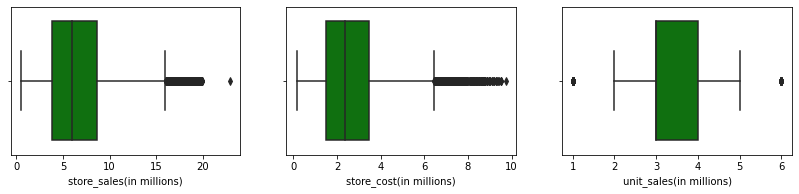

In [16]:
#Checking the is there outliers using boxplot
plt.figure(figsize=(14,6))
plt.subplot(231)
sns.boxplot(df['store_sales(in millions)'],color='g')
plt.subplot(232)
sns.boxplot(df['store_cost(in millions)'],color='g')
plt.subplot(233)
sns.boxplot(df['unit_sales(in millions)'],color='g')


In [17]:
df.shape

(60428, 40)

In [18]:
# Removing outliers
df = df[df['store_sales(in millions)']<16]
df = df[df['store_cost(in millions)']<6.5]
print(df.shape)

(59384, 40)


In [19]:
#df.drop_duplicates(subset=[df.columns], inplace=True)

# Exploratory Analysis

#univariate analysis

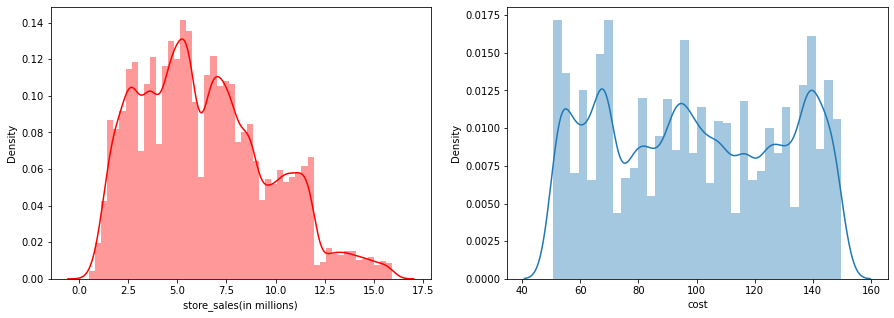

In [20]:
#plotting the using distplot
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(df['store_sales(in millions)'], color='r')
plt.subplot(122)
sns.distplot(df['cost'])
plt.show()

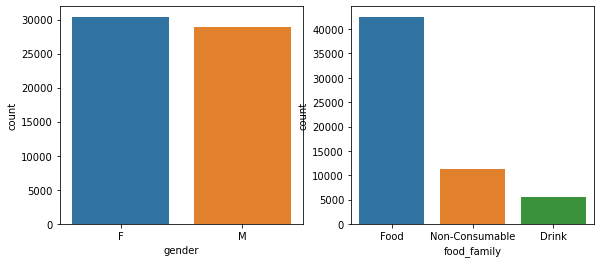

In [21]:
#plotting the count plot
plt.figure(figsize=(20,4))
plt.subplot(1,4,1)
sns.countplot(df['gender'])
plt.subplot(1,4,2)
sns.countplot(df['food_family'])
plt.show()

#Bivariate analysis

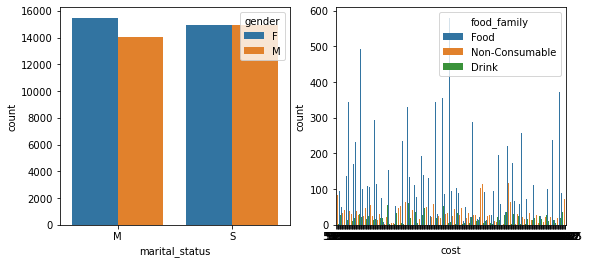

In [22]:
plt.figure(figsize=(14,4))
plt.subplot(131)
sns.countplot(df['marital_status'], hue=df['gender'])
plt.subplot(132)
sns.countplot(df['cost'], hue=df['food_family'])
plt.show()

#visualising two colunms againist each other
plt.figure(figsize=(20,20))
plt.subplot(131)
sns.countplot(df['cost'], hue=df['food_category'])
plt.subplot(132)
sns.countplot(df['cost'], hue=df['media_type'])
plt.show()

<AxesSubplot:>

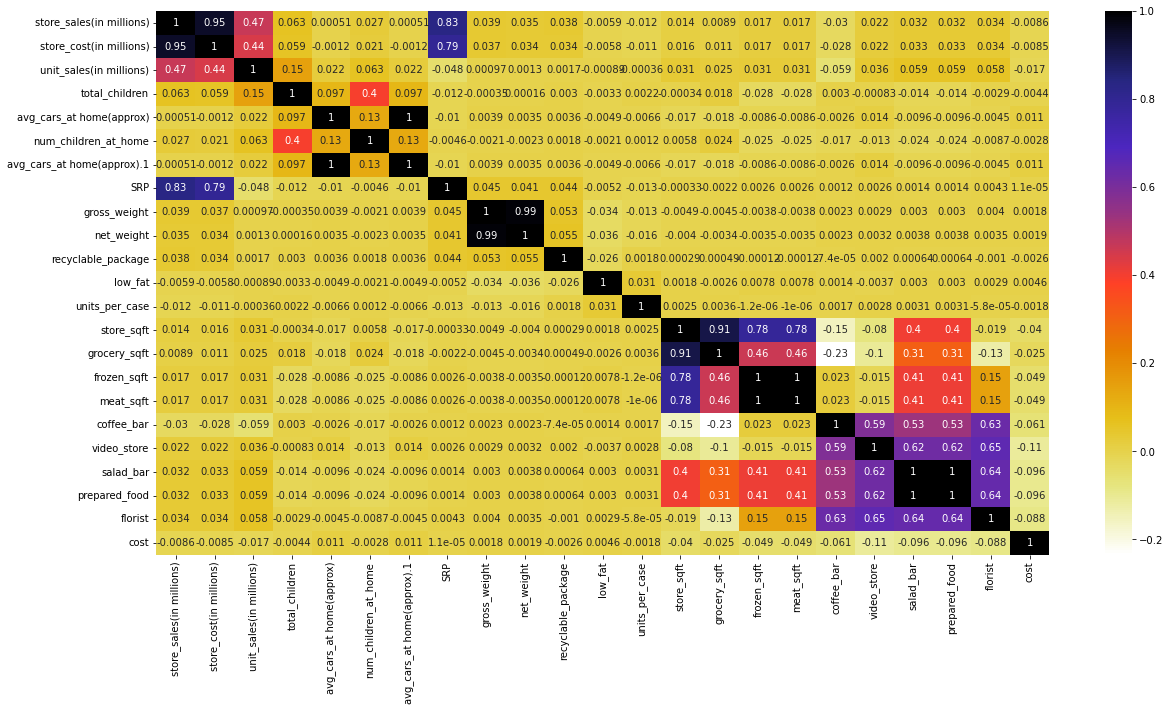

In [23]:
#df.corr()
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap=plt.cm.CMRmap_r)


# Feature Engineering

In [24]:
df.drop(['avg. yearly_income'],axis=1,inplace=True)

In [25]:
from sklearn.preprocessing import LabelEncoder
def encoder(data,variable):
    lb=LabelEncoder()
    df[variable]=lb.fit_transform(df[variable])   

loop through the column names and data types
for col_name, col_type in df.dtypes.iteritems():
    if col_type == 'object':
        print(col_name) 

for col in df.info:
    if col_type == 'object':
         print(col)
        
                
   

In [26]:
from sklearn.preprocessing import LabelEncoder
def encoder(data,variable):
    lb=LabelEncoder()
    df[variable]=lb.fit_transform(df[variable])   

In [27]:
# encoding categorical feature
encoder(df,'food_category')
encoder(df,'food_department')
encoder(df,'food_family')
encoder(df,'promotion_name')
encoder(df,'sales_country')
encoder(df,'marital_status')
encoder(df,'gender')
encoder(df,'education')
encoder(df,'media_type')
encoder(df,'member_card')
encoder(df,'occupation')
encoder(df,'houseowner')
encoder(df,'brand_name')
encoder(df,'store_type')
encoder(df,'store_city')
encoder(df,'store_state')
encoder(df,'media_type')


In [28]:
X = df.drop("cost",axis=1) 
Y = df["cost"] 


In [29]:
X

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type
0,4,12,1,7.36,2.7232,4,0,2,0,0,...,27694,18670,5415,3610,1,1,1,1,1,3
1,4,12,1,5.52,2.5944,3,6,2,0,1,...,27694,18670,5415,3610,1,1,1,1,1,3
2,4,12,1,3.68,1.3616,2,18,2,1,0,...,27694,18670,5415,3610,1,1,1,1,1,3
3,4,12,1,3.68,1.1776,2,6,2,0,0,...,27694,18670,5415,3610,1,1,1,1,1,5
4,4,12,1,4.08,1.4280,3,11,2,0,1,...,27694,18670,5415,3610,1,1,1,1,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,42,7,2,2.76,1.3248,1,48,2,0,0,...,22478,15321,4294,2863,1,0,0,0,0,5
60424,42,7,2,1.60,0.4960,1,24,2,1,0,...,22478,15321,4294,2863,1,0,0,0,0,9
60425,42,7,2,5.52,2.5392,2,47,2,0,1,...,22478,15321,4294,2863,1,0,0,0,0,11
60426,42,7,2,8.28,2.5668,3,31,0,1,1,...,34452,27463,4193,2795,1,0,0,0,1,9


In [30]:
# saving the dataframe
#X.to_csv('afterencoding.csv')

In [31]:
# Data Normalization
from sklearn.preprocessing import StandardScaler
st=StandardScaler()

In [32]:
st.fit(X)

StandardScaler()

In [33]:
scaled_data=st.transform(X)

In [34]:
scaled_data

array([[-1.50271845,  0.09136775, -0.18940145, ...,  0.83793349,
         0.88178133, -0.79814462],
       [-1.50271845,  0.09136775, -0.18940145, ...,  0.83793349,
         0.88178133, -0.79814462],
       [-1.50271845,  0.09136775, -0.18940145, ...,  0.83793349,
         0.88178133, -0.79814462],
       ...,
       [ 1.13474198, -0.72702537,  1.72082537, ..., -1.19341214,
        -1.13406801,  1.49346232],
       [ 1.13474198, -0.72702537,  1.72082537, ..., -1.19341214,
         0.88178133,  0.92056059],
       [ 1.13474198, -0.72702537,  1.72082537, ..., -1.19341214,
         0.88178133, -0.79814462]])

# Applying PCA Algorithms

In [35]:
#Applying PCA Algorithms
from sklearn.decomposition import PCA

In [36]:
pca=PCA(n_components=8)

In [37]:
data_pca=pca.fit_transform(X)

In [38]:
data_pca

array([[-4.60150945e+02, -3.13342126e+02, -3.34192770e+01, ...,
         2.05261144e+00,  9.39293791e+00, -3.63616103e+00],
       [-4.60151780e+02, -3.13340580e+02, -3.34299451e+01, ...,
         2.00259302e+00,  9.36611071e+00, -3.66261046e+00],
       [-4.60153323e+02, -3.13337085e+02, -3.34526417e+01, ...,
         1.90511733e+00,  9.33192036e+00, -3.76913022e+00],
       ...,
       [-6.80180104e+03, -1.69527700e+02, -5.26506976e+01, ...,
        -7.38932869e+00,  7.23523991e+00,  1.05199357e+00],
       [ 9.54338234e+03,  4.69407730e+03, -5.22864959e+01, ...,
        -7.12821969e+00,  7.35350104e+00, -1.98895159e+00],
       [ 9.54338382e+03,  4.69406455e+03,  3.06816650e+01, ...,
        -9.92312720e+00,  9.71299201e+00, -1.71126508e+00]])

In [39]:
data_pca.shape

(59384, 8)

In [40]:
pca.explained_variance_

array([4.82898968e+07, 3.63173407e+06, 9.58031834e+02, 2.20160600e+02,
       1.91974974e+02, 1.05290487e+02, 4.34425225e+01, 2.45460483e+01])

In [41]:
pca.components_

array([[-1.87908884e-05, -6.50810265e-06, -5.26628697e-08,
         6.07002244e-06,  2.83696363e-06,  3.55088086e-06,
        -1.30049844e-04, -1.00375472e-05, -1.35904582e-06,
        -1.62411077e-06,  8.35237533e-07,  3.31933709e-06,
        -3.39226709e-06,  1.51982742e-06, -2.30747410e-07,
        -2.75216530e-06,  1.89985128e-06, -2.75216530e-06,
         3.29522025e-05, -1.00361876e-07, -3.23314657e-06,
        -2.65822873e-06,  2.45239658e-08,  5.65938811e-08,
         4.12448215e-06, -4.46768252e-05, -3.08505844e-05,
         1.71161478e-04,  8.16171686e-01,  5.43263314e-01,
         1.63747985e-01,  1.09157191e-01, -1.22417617e-05,
        -5.99154730e-06,  2.74939706e-05,  2.74939706e-05,
        -3.15008068e-06,  6.40455428e-05],
       [ 1.62110538e-05,  1.63261296e-05,  6.25791080e-07,
        -1.78102781e-05, -6.64807672e-06, -5.31326333e-06,
         2.71043068e-04, -9.74483972e-05, -3.06347223e-06,
        -1.04270999e-05,  3.51257901e-05,  2.38097487e-06,
        -1.24

In [42]:
pca.components_.shape

(8, 38)

In [43]:
# number of components
n_pcs = pca.components_.shape[0]

In [44]:
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

In [45]:
initial_feature_names = [X.columns][0]

In [46]:
#to get columns names
initial_feature_names

Index(['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'num_children_at_home', 'avg_cars_at home(approx).1', 'brand_name',
       'SRP', 'gross_weight', 'net_weight', 'recyclable_package', 'low_fat',
       'units_per_case', 'store_type', 'store_city', 'store_state',
       'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar',
       'video_store', 'salad_bar', 'prepared_food', 'florist', 'media_type'],
      dtype='object')

In [47]:
# get the index of the most important feature on EACH component i.e. largest absolute value
# using LIST COMPREHENSION HERE
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [48]:
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

In [49]:
# build the dataframe
df = pd.DataFrame(sorted(dic.items()))

In [50]:
df

,0,1
0,PC1,store_sqft
1,PC2,grocery_sqft
2,PC3,brand_name
3,PC4,food_category
4,PC5,promotion_name
5,PC6,units_per_case
6,PC7,net_weight
7,PC8,store_city


In [51]:
pca=PCA()

In [52]:
#pca.get_feature_names_out(input_features=X.columns)

plt.figure(figsize=(8,6))
plt.scatter(data_pca[:,0],data_pca[:,1],c=df['cost'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [53]:
X1=data_pca


In [54]:
X1

array([[-4.60150945e+02, -3.13342126e+02, -3.34192770e+01, ...,
         2.05261144e+00,  9.39293791e+00, -3.63616103e+00],
       [-4.60151780e+02, -3.13340580e+02, -3.34299451e+01, ...,
         2.00259302e+00,  9.36611071e+00, -3.66261046e+00],
       [-4.60153323e+02, -3.13337085e+02, -3.34526417e+01, ...,
         1.90511733e+00,  9.33192036e+00, -3.76913022e+00],
       ...,
       [-6.80180104e+03, -1.69527700e+02, -5.26506976e+01, ...,
        -7.38932869e+00,  7.23523991e+00,  1.05199357e+00],
       [ 9.54338234e+03,  4.69407730e+03, -5.22864959e+01, ...,
        -7.12821969e+00,  7.35350104e+00, -1.98895159e+00],
       [ 9.54338382e+03,  4.69406455e+03,  3.06816650e+01, ...,
        -9.92312720e+00,  9.71299201e+00, -1.71126508e+00]])

In [55]:
Y

0        126.62
1         59.86
2         84.16
3         95.78
4         50.79
          ...  
60423     95.25
60424     69.42
60425     67.51
60426    132.88
60427     87.76
Name: cost, Length: 59384, dtype: float64

In [56]:
#separating dataset into train and test
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y_train, Y_test = train_test_split(X1,Y,test_size=0.3,random_state=0)
X1_train.shape, X1_test.shape

((41568, 8), (17816, 8))

In [57]:
X1_train

array([[ 9.50229732e+03, -2.74619774e+03, -3.12306312e+01, ...,
         3.13779239e-01, -8.65838487e+00,  8.81300610e-01],
       [ 3.10288363e+03, -1.00528953e+03, -5.12781164e+01, ...,
         1.37707489e+01,  1.76916862e+00,  2.44466064e+00],
       [-8.50466851e+03,  2.56768044e+03,  2.49090342e+01, ...,
        -3.93693785e+00,  1.04646204e+00, -2.18230670e+00],
       ...,
       [-4.96321939e+03,  6.11839585e+02,  2.58145238e+01, ...,
         1.17810061e+01, -2.57244346e+00,  2.16665238e+00],
       [ 9.42319466e+03,  3.13782595e+03, -4.81559188e+01, ...,
         9.03724070e-01, -1.93089447e+00, -6.20852454e+00],
       [ 6.83119553e+03, -1.07045250e+03, -2.01855411e+01, ...,
        -6.94456243e+00,  4.94819410e+00, -6.67578217e+00]])

In [58]:
X1_test

array([[-8.50466857e+03,  2.56768355e+03, -1.30600002e+01, ...,
        -1.86174923e+00,  5.55405035e+00, -9.37693494e-01],
       [-4.96321974e+03,  6.11840417e+02,  1.61970065e+01, ...,
         6.58417826e+00, -3.89875895e+00,  9.39541975e+00],
       [-4.60151010e+02, -3.13343832e+02, -1.54588377e+01, ...,
        -3.50925340e-01,  6.32869310e+00,  9.31388889e-01],
       ...,
       [ 3.36759823e+03,  1.64520859e+03, -3.21139048e+01, ...,
        -1.48074225e+01,  7.89031673e+00, -9.67077169e+00],
       [-4.96322206e+03,  6.11852669e+02, -5.07299216e+01, ...,
         5.75153759e+00,  1.32054302e+00,  6.60540937e+00],
       [-6.17462559e+03, -2.33377992e+03, -4.45442241e+01, ...,
         1.26215809e+00, -7.22873989e+00,  2.43330955e+00]])

In [59]:
Y_train

822      137.17
29371     65.70
18459    108.22
43682    139.37
37153    135.92
          ...  
46704     89.90
53344     80.29
43339    147.18
44317    144.31
2776      69.65
Name: cost, Length: 41568, dtype: float64

In [60]:
Y_test

9336     118.36
15797     65.68
40401     55.59
10254    144.38
40164     62.74
          ...  
5302     146.72
32807     94.79
7741      97.45
21913     65.68
32203    107.89
Name: cost, Length: 17816, dtype: float64

# MODEL BUILDING

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
lr.fit(X1_train,Y_train)
ypred=lr.predict(X1_test) #test on Y
xpred=lr.predict(X1_train)
score=r2_score(Y_test,ypred)
rmse=np.sqrt(mean_squared_error(Y_test,ypred))
score1=r2_score(Y_train,xpred)
rmse1=np.sqrt(mean_squared_error(Y_train,xpred))

print('----****----Linear Regression model---****-----')
print('Model performance for Test set')
print("R2_Score : ",score)
print("RMSE : ", rmse)

print('----------------------------------')
print('Model performance for Training set')
print("R2_Score : ",score1)
print("RMSE  : ", rmse1)


----****----Linear Regression model---****-----
Model performance for Test set
R2_Score :  0.005881340390355372
RMSE :  30.124858391960863
----------------------------------
Model performance for Training set
R2_Score :  0.0048312611221303925
RMSE  :  29.844142792767677


In [62]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X1_train,Y_train)
ypred=(rf.predict(X1_test))
xpred=(rf.predict(X1_train))
score=r2_score(Y_test,ypred)
rmse=np.sqrt(mean_squared_error(Y_test,ypred))
score1=r2_score(Y_train,xpred)
rmse1=np.sqrt(mean_squared_error(Y_train,xpred))

print('----****----Random Forest Regressor model---****-----')
print('Model performance for Test set')
print("R2_Score : ",score)
print("RMSE : ", rmse)

print('----------------------------------')
print('Model performance for Training set')
print("R2_Score : ",score1)
print("RMSE  : ", rmse1)


----****----Random Forest Regressor model---****-----
Model performance for Test set
R2_Score :  0.8790563080595666
RMSE :  10.507454357966921
----------------------------------
Model performance for Training set
R2_Score :  0.9825734684136165
RMSE  :  3.949264538499454


In [63]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(X1_train,Y_train)
ypred=(gb.predict(X1_test))
xpred=(rf.predict(X1_train))
score=r2_score(Y_test,ypred)
rmse=np.sqrt(mean_squared_error(Y_test,ypred))
score1=r2_score(Y_train,xpred)
rmse1=np.sqrt(mean_squared_error(Y_train,xpred))
print('Model performance for Test set')
print("R2_Score : ",score)
print("RMSE : ", rmse)

print('----------------------------------')
print('Model performance for Training set')
print("R2_Score : ",score1)
print("RMSE  : ", rmse1)


Model performance for Test set
R2_Score :  0.2939617434764339
RMSE :  25.38750478252106
----------------------------------
Model performance for Training set
R2_Score :  0.9825734684136165
RMSE  :  3.949264538499454


In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
Dtr=DecisionTreeRegressor()
Dtr.fit(X1_train,Y_train)
ypred=(Dtr.predict(X1_test))
xpred=(Dtr.predict(X1_train))
score=r2_score(Y_test,ypred)
rmse=np.sqrt(mean_squared_error(Y_test,ypred))
score1=r2_score(Y_train,xpred)
rmse1=np.sqrt(mean_squared_error(Y_train,xpred))
mae = mean_absolute_error(Y_test, ypred)
mse = mean_squared_error(Y_test, ypred)

print('----****----Random Forest Regressor model---****-----')
print('Model performance for Test set')
print("R2_Score : ",score)
print("RMSE : ", rmse)

print('----------------------------------')
print('Model performance for Training set')
print("R2_Score : ",score1)
print("RMSE  : ", rmse1)
print("mean_absolute_error  : ", mae)
print("mean_squared_error  : ", mse)




----****----Random Forest Regressor model---****-----
Model performance for Test set
R2_Score :  0.7503272061756197
RMSE :  15.097029783154767
----------------------------------
Model performance for Training set
R2_Score :  1.0
RMSE  :  1.2526949439074018e-13
mean_absolute_error  :  4.451000224517353
mean_squared_error  :  227.92030827346204


In [65]:
#test with random forest regressor
example = [['27694','18670','20','4','0','17','17.7','12']]
result = rf.predict(example)
print(result)

[141.2781]


In [66]:
#test with Gradient Boosting regressor
example = [['27694','18670','20','4','0','17','17.7','12']]
result = gb.predict(example)
print(result)

[124.74164083]


In [67]:
#test with decision Tree regressor
example = [['27694','18670','20','4','0','17','17.7','12']]
result = Dtr.predict(example)
print(result)

[148.62]


# Saving the model 

In [68]:
import pickle 
pickle.dump(rf,open('costcustomers.pkl','wb'))

transform(Y)

transform(np.sqrt(Y))

transform(np.cbrt(Y))

transform(np.log(Y))

boxcox,params=stat.boxcox(Y)
transform(boxcox)